# Model Evaluation

## Standard Flares

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


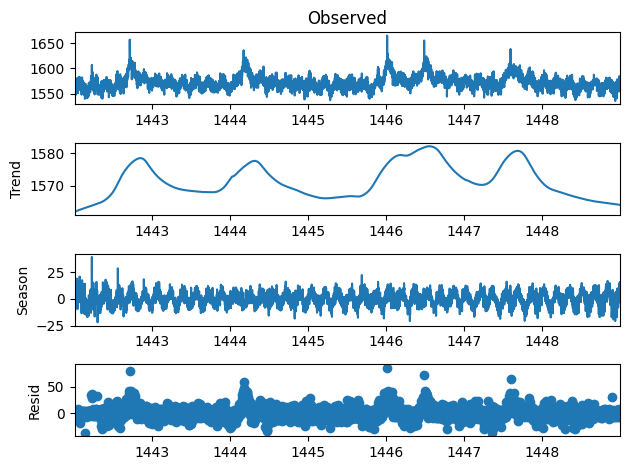

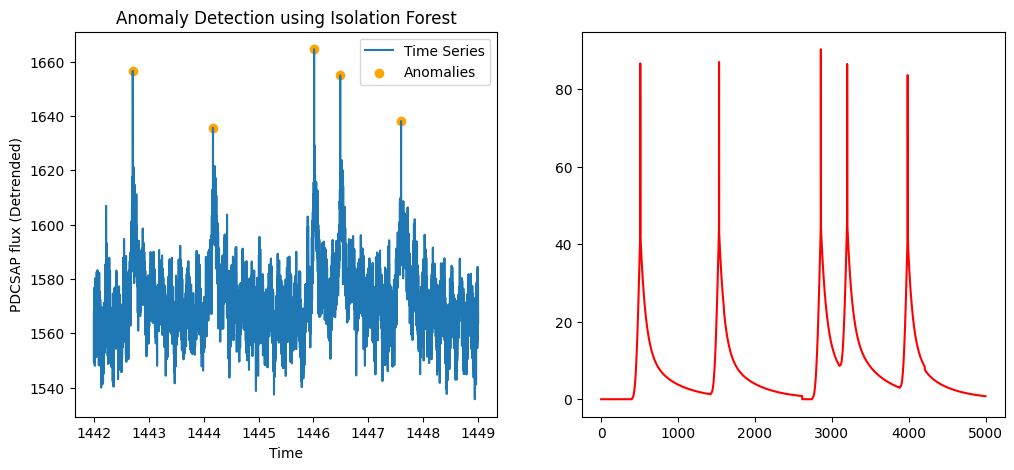

In [27]:
## Load Data
import pandas as pd
inj_std = pd.read_csv("../0.Data/031381302_inj_std.csv", index_col = 'time')
data = inj_std



## STL Decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(data, period=240, robust=True)  # Use period=240 based on EDA
decomposition = stl.fit()

decomposition.plot()



## Run Model
from sklearn.ensemble import IsolationForest

# Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

# Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = 'auto', random_state = 42)
# random_state: for reproducibility.
model.fit(data)

# Predict anomalies
anomalies = model.predict(data)
scores = model.decision_function(data)

# Save
data['anomaly'] = anomalies
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data['anomaly_score'] = scores



## Plot - Highlight anomalies
import matplotlib.pyplot as plt
import numpy as np

# Simulated Flares
flareSims = np.load("flareSims.npz")

# Anomalies
anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['pdcsap_flux'], label='Time Series')#, color='steelblue')
ax[0].scatter(anomalies.index, anomalies['pdcsap_flux'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_std"], 'r-')

plt.show()

### Results

In [11]:
#

inj_std.head()
# decomposition.resid.head()
anomalies

array([1, 1, 1, ..., 1, 1, 1])

## High-Emission Flares

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


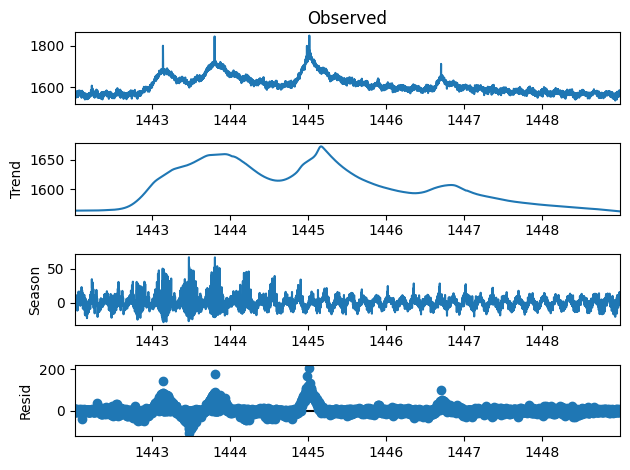

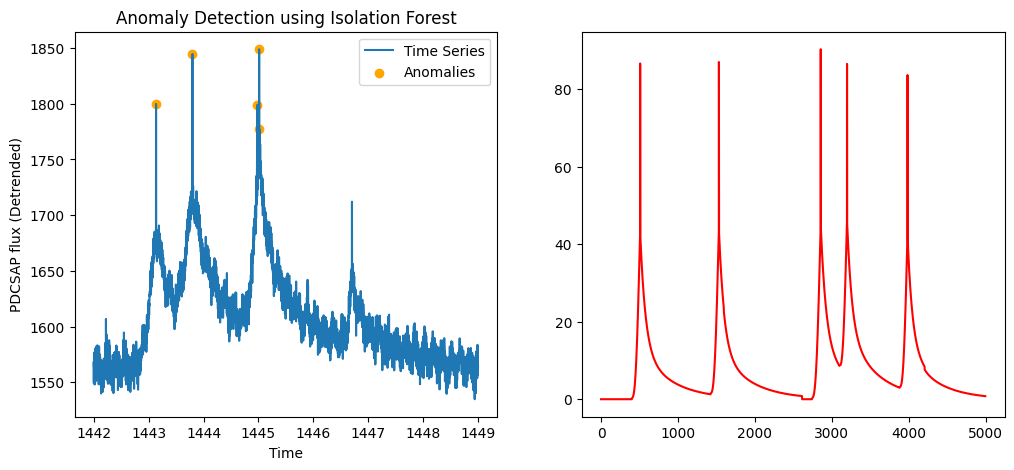

In [28]:
## Load Data
inj_high = pd.read_csv("../0.Data/031381302_inj_high.csv", index_col = 'time')
data = inj_high


## STL Decomposition
stl = STL(data, period=240, robust=True)  # Use period=240 based on EDA
decomposition = stl.fit()

decomposition.plot()



## Run Model
# Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

# Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = 'auto', random_state = 42)
# random_state: for reproducibility.
model.fit(data)

# Predict anomalies
anomalies = model.predict(data)
scores = model.decision_function(data)

# Save
data['anomaly'] = anomalies
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data['anomaly_score'] = scores



## Plot - Highlight anomalies
# Anomalies
anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['pdcsap_flux'], label='Time Series')#, color='steelblue')
ax[0].scatter(anomalies.index, anomalies['pdcsap_flux'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_std"], 'r-')

plt.show()

### Results

In [ ]:
#

## Low-Emission Flares

C:\Users\alexd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


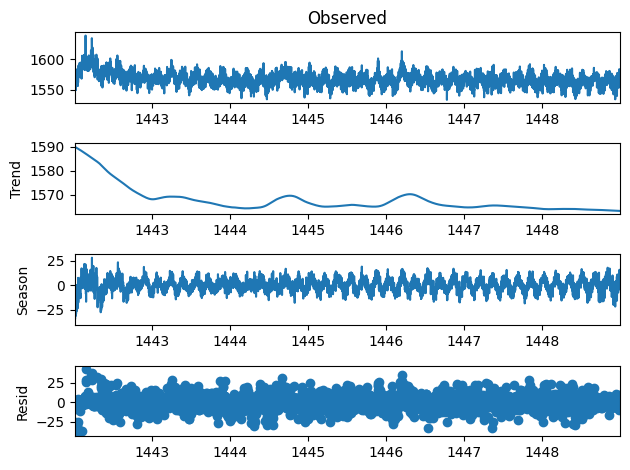

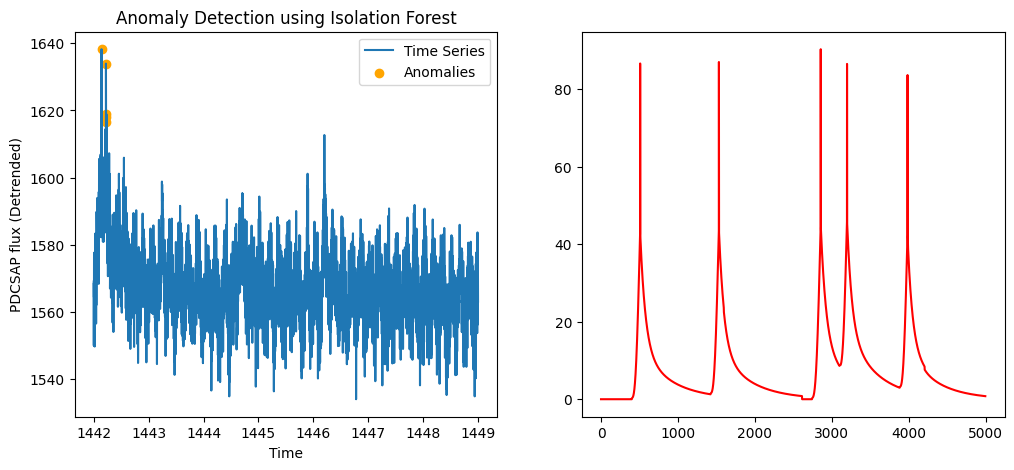

In [29]:
## Load Data
inj_low = pd.read_csv("../0.Data/031381302_inj_low.csv", index_col = 'time')
data = inj_low


## STL Decomposition
stl = STL(data, period=240, robust=True)  # Use period=240 based on EDA
decomposition = stl.fit()

decomposition.plot()



## Run Model
# Hyperparameters
n_estimators = 100 # Number of trees
contamination = 0.001 # Expected proportion of anomalies
sample_size = 256 # Number of samples used to train each tree

# Isolation Forest
model = IsolationForest(n_estimators = n_estimators, contamination = contamination, max_samples = sample_size)
#contamination = 'auto', random_state = 42)
# random_state: for reproducibility.
model.fit(data)

# Predict anomalies
anomalies = model.predict(data)
scores = model.decision_function(data)

# Save
data['anomaly'] = anomalies
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data['anomaly_score'] = scores



## Plot - Highlight anomalies
# Anomalies
anomalies = data[data['anomaly'] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

ax[0].plot(data['pdcsap_flux'], label='Time Series')#, color='steelblue')
ax[0].scatter(anomalies.index, anomalies['pdcsap_flux'], label='Anomalies', color='orange')
ax[0].set_title('Anomaly Detection using Isolation Forest')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PDCSAP flux (Detrended)')
ax[0].legend()

ax[1].plot(flareSims["flare_std"], 'r-')

plt.show()

### Results

In [ ]:
#